<a href="https://colab.research.google.com/github/dbetanc1/MAT494/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3
Calculus and Optimization

# 3.3 Unconstrained Optimization
Derive optimality conditions for unconstrained continuous
optimization problems and start with local minimizers.

In [26]:
import numpy as np
from scipy.optimize import minimize
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [27]:
print(res.x)

[1. 1. 1. 1. 1.]


In [28]:
def rosen_with_args(x, a, b):
    """The Rosenbrock function with additional arguments"""
    return sum(a*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0) + b
    x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen_with_args, x0, method='nelder-mead',
               args=(0.5, 1.), options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 319
         Function evaluations: 525


In [29]:
print(res.x)

[1.         1.         1.         1.         0.99999999]


3.3.1 Necessary and Suﬀicent Conditions of Local Minimizers

3.3.2 Convexity and Global Minimizers
A real-valued function is called convex if the line segment between any two points on the graph of the function lies above the graph between the two points. Our optimality conditions have only concerned local minimizers. In- deed, in the absence of global structure, local information such as gradients and Hessians can only inform about the immediate neighborhood of points. Here we consider convexity, under which local minimizers are also global minimizers.



In [38]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))


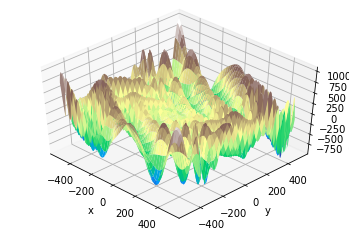

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

3.3.3 Gradient Descent

In [32]:
import numpy as np
from scipy.optimize import minimize
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [33]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In [34]:
print(res.x)

[1.00000004 1.0000001  1.00000021 1.00000044 1.00000092]


In [35]:
def rosen_and_der(x):
    objective = sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return objective, der

In [36]:
res = minimize(rosen_and_der, x0, method='BFGS', jac=True,
               options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In [37]:
print(res.x)

[1.00000004 1.0000001  1.00000021 1.00000044 1.00000092]
